In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

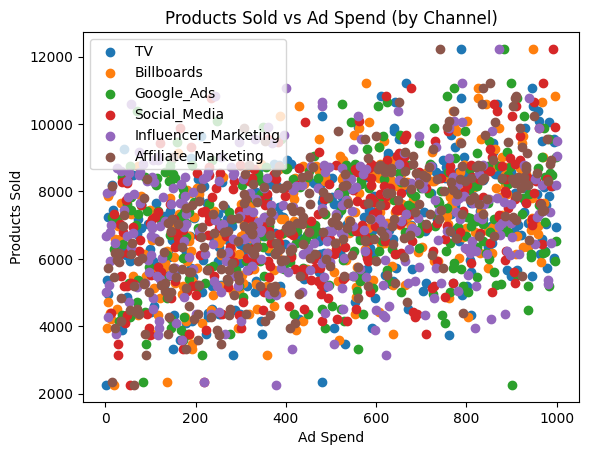

In [3]:
df = pd.read_csv("/Users/jacksonsorenson/Downloads/Advertising_Data.csv")
df.head()

channels = ['TV','Billboards','Google_Ads','Social_Media','Influencer_Marketing','Affiliate_Marketing']

for channel in channels:
    plt.scatter(df[channel], df['Product_Sold'], label=channel)


plt.xlabel('Ad Spend')
plt.ylabel('Products Sold')
plt.title('Products Sold vs Ad Spend (by Channel)')
plt.legend()


plt.show()

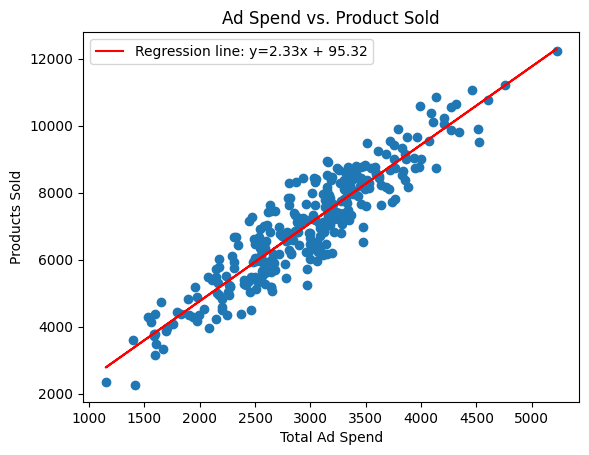

In [5]:
#Linear regression

ad_spend = []
products_sold = []


for i in range(len(df)):
    total_ad_spend = df.iloc[i][['TV','Billboards','Google_Ads','Social_Media','Influencer_Marketing','Affiliate_Marketing']].sum()
    units_sold = df.iloc[i]['Product_Sold']
    ad_spend.append(total_ad_spend)
    products_sold.append(units_sold)

slope, intercept = np.polyfit(ad_spend, products_sold, 1)  
regression_line = np.array(ad_spend) * slope + intercept  
plt.plot(ad_spend, regression_line, color='red', label=f'Regression line: y={slope:.2f}x + {intercept:.2f}')

plt.scatter(ad_spend, products_sold)
plt.xlabel("Total Ad Spend")
plt.ylabel("Products Sold")
plt.title("Ad Spend vs. Product Sold")
plt.legend()
plt.show()


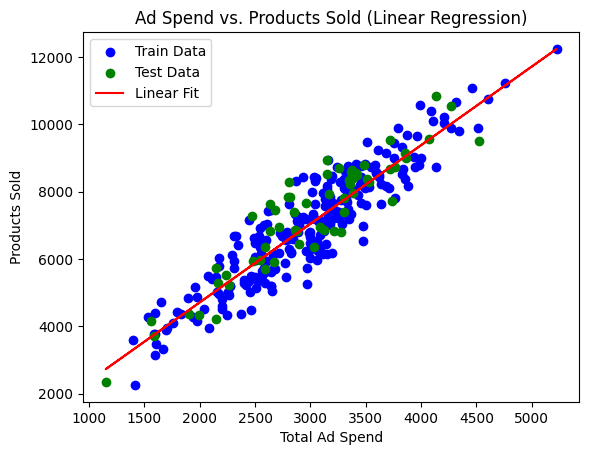

In [6]:
#Training/ Testing Data
ad_spend = np.array(ad_spend).reshape(-1, 1)
products_sold = np.array(products_sold)

ad_spend_train, ad_spend_test, products_sold_train, products_sold_test = train_test_split(ad_spend, products_sold, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(ad_spend_train, products_sold_train)

products_sold_train_pred_linear = linear_model.predict(ad_spend_train)
products_sold_test_pred_linear = linear_model.predict(ad_spend_test)

plt.scatter(ad_spend_train, products_sold_train, color='blue', label='Train Data')
plt.scatter(ad_spend_test, products_sold_test, color='green', label='Test Data')
plt.plot(ad_spend, linear_model.predict(ad_spend), color='red', label='Linear Fit')

plt.xlabel("Total Ad Spend")
plt.ylabel("Products Sold")
plt.title("Ad Spend vs. Products Sold (Linear Regression)")
plt.legend()
plt.show()


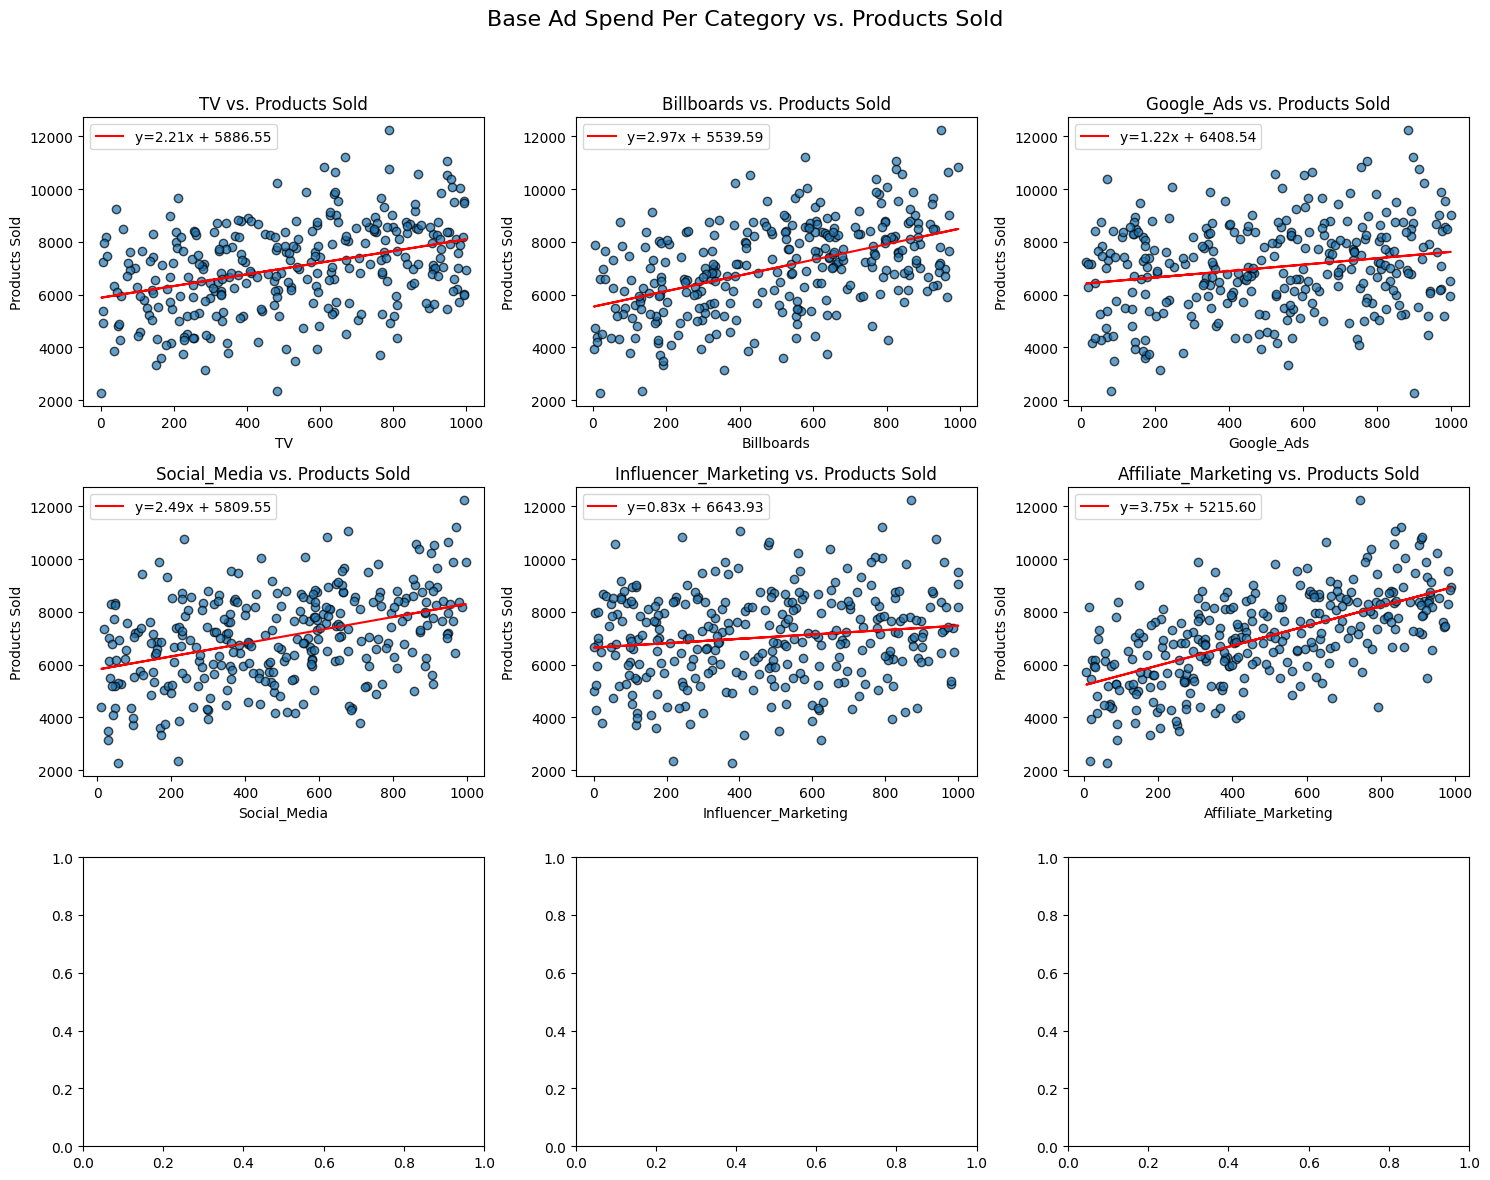

In [7]:
#Base Ad Spend vs Product Sold
features_base = ['TV','Billboards','Google_Ads','Social_Media','Influencer_Marketing','Affiliate_Marketing']

fig, axs = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Base Ad Spend Per Category vs. Products Sold', fontsize=16)

for idx, feature in enumerate(features_base):
    row = idx // 3  
    col = idx % 3
    axs[row, col].scatter(df[feature], df['Product_Sold'], alpha=0.7, edgecolor='black')
    axs[row, col].set_title(f'{feature} vs. Products Sold')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Products Sold')

    slope, intercept = np.polyfit(df[feature], df['Product_Sold'], 1)
    regression_line = slope * df[feature] + intercept

    axs[row, col].plot(df[feature], regression_line, color='red', label=f'y={slope:.2f}x + {intercept:.2f}')
    axs[row, col].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

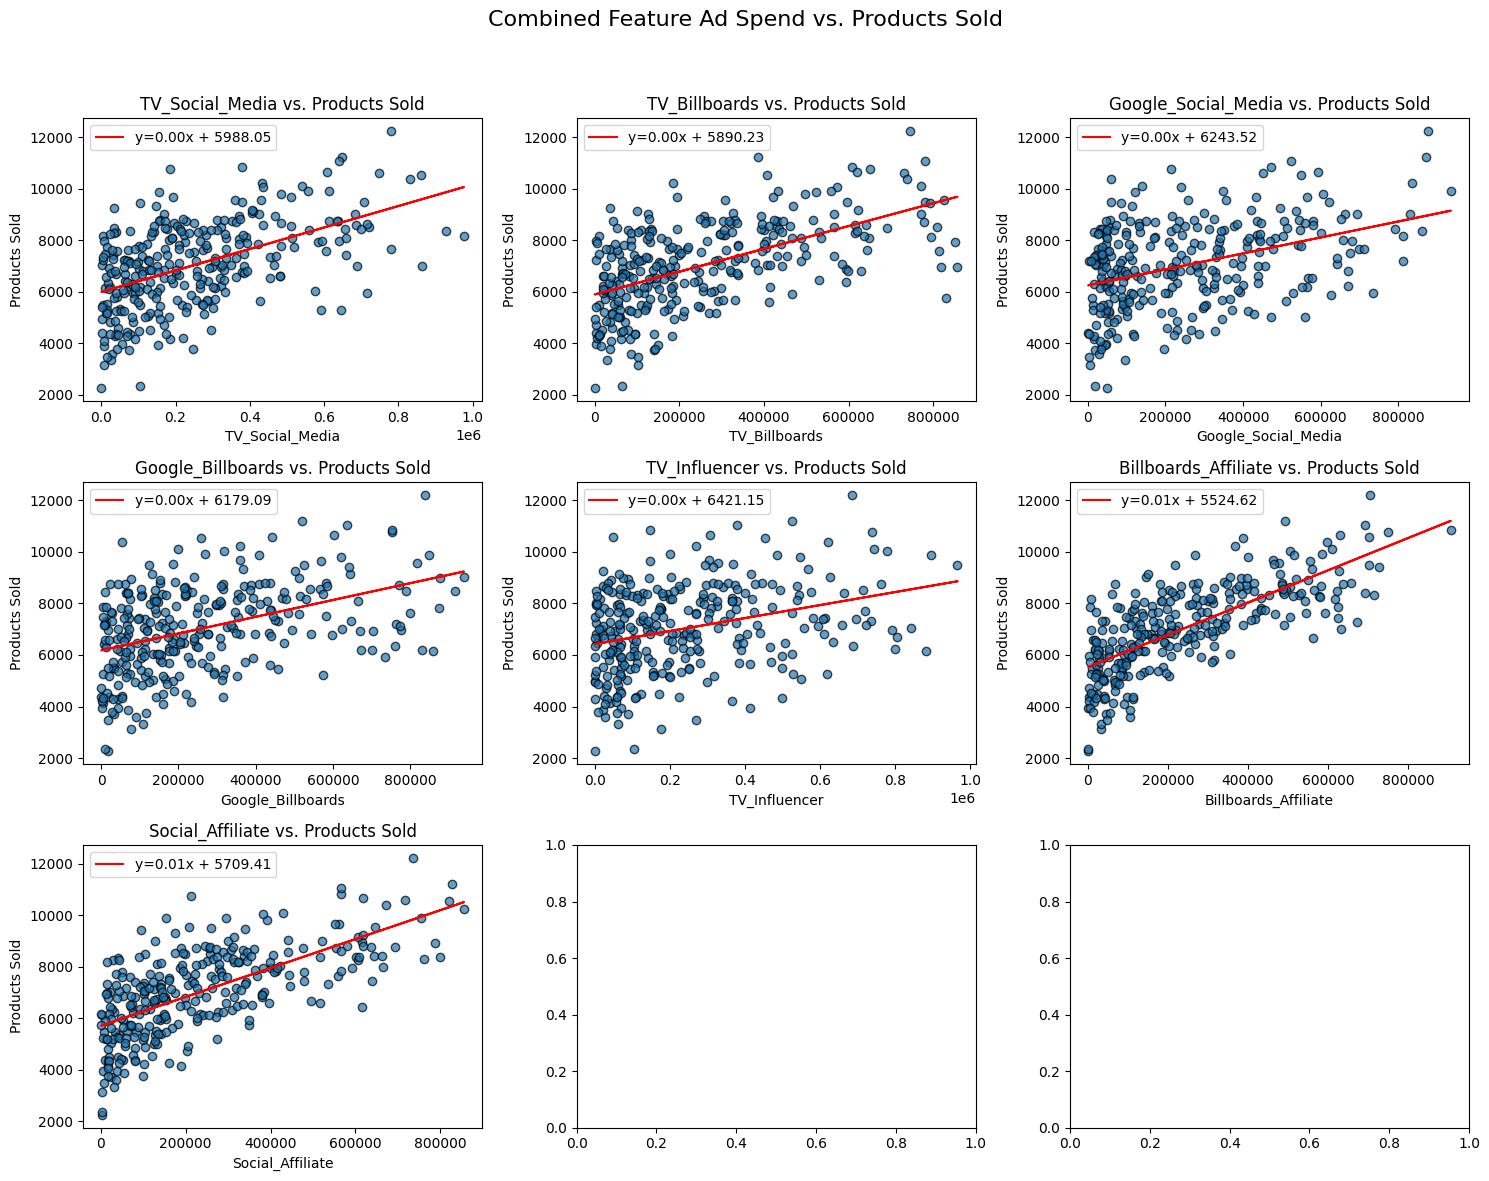

In [8]:
#Multiple Regression
df['TV_Social_Media'] = df['TV'] * df['Social_Media']
df['TV_Billboards'] = df['TV'] * df['Billboards']
df['Google_Social_Media'] = df['Google_Ads'] * df['Social_Media']
df['Google_Billboards'] = df['Google_Ads'] * df['Billboards']
df['TV_Influencer'] = df['TV'] * df['Influencer_Marketing']
df['Billboards_Affiliate'] = df['Billboards'] * df['Affiliate_Marketing']
df['Social_Affiliate'] = df['Social_Media'] * df['Affiliate_Marketing']

interaction_features = ['TV_Social_Media', 'TV_Billboards', 'Google_Social_Media', 'Google_Billboards', 'TV_Influencer', 'Billboards_Affiliate', 'Social_Affiliate']

fig, axs = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Combined Feature Ad Spend vs. Products Sold', fontsize=16)

for idx, feature in enumerate(interaction_features):
    row = idx // 3  
    col = idx % 3   
    axs[row, col].scatter(df[feature], df['Product_Sold'], alpha=0.7, edgecolor='black')
    axs[row, col].set_title(f'{feature} vs. Products Sold')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Products Sold')

    slope, intercept = np.polyfit(df[feature], df['Product_Sold'], 1)
    regression_line = slope * df[feature] + intercept

    axs[row, col].plot(df[feature], regression_line, color='red', label=f'y={slope:.2f}x + {intercept:.2f}')
    axs[row, col].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()